In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-startups-2021/2021_registered_companies.csv


In [4]:
data=pd.read_csv('/kaggle/input/indian-startups-2021/2021_registered_companies.csv')

In [3]:
data.head()

,company_uid,date_of_registration,month_name,state,roc,category,class,company_type,authorized_capital,paidup_capital,activity_code,activity_description
0,b928b473-d6d6-4b92-a63d-d262bf30c24b,19/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1500000.0,102000.0,45309.0,Construction
1,9696190f-7478-4d61-81f1-fc4eb08cce13,25/01/21,Jan-21,Tamil Nadu,RoC-Chennai,Company limited by Shares,Private,Non-govt company,100000.0,3000.0,74994.0,Business Services
2,59de4ca1-c15f-4d6d-8de3-03319793c884,14/01/21,Jan-21,Maharashtra,RoC-Pune,Company limited by Shares,Public,Non-govt company,500000.0,500000.0,65990.0,Finance
3,e28b4caa-b7f9-4faf-8bbe-b12028177417,25/01/21,Jan-21,Telangana,RoC-Hyderabad,Company limited by Shares,Private,Non-govt company,1000000.0,10000.0,72900.0,Business Services
4,e1861c6f-c2a0-4a89-81e9-b39f11b1b6c6,19/01/21,Jan-21,Jammu & Kashmir,RoC-Jammu,Company limited by Shares,Private,Non-govt company,500000.0,500000.0,72900.0,Business Services


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company_uid           54894 non-null  object 
 1   date_of_registration  54894 non-null  object 
 2   month_name            54894 non-null  object 
 3   state                 54894 non-null  object 
 4   roc                   54894 non-null  object 
 5   category              54894 non-null  object 
 6   class                 54894 non-null  object 
 7   company_type          54894 non-null  object 
 8   authorized_capital    54894 non-null  float64
 9   paidup_capital        54894 non-null  float64
 10  activity_code         54894 non-null  float64
 11  activity_description  54894 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.0+ MB


In [6]:
data.shape

(54894, 12)

In [7]:
import seaborn as sns

In [9]:
data['authorized_capital']=data['authorized_capital'].astype(int)
data['paidup_capital']=data['paidup_capital'].astype(int)
data['activity_code']=data['activity_code'].astype(int)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54894 entries, 0 to 54893
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   company_uid           54894 non-null  object
 1   date_of_registration  54894 non-null  object
 2   month_name            54894 non-null  object
 3   state                 54894 non-null  object
 4   roc                   54894 non-null  object
 5   category              54894 non-null  object
 6   class                 54894 non-null  object
 7   company_type          54894 non-null  object
 8   authorized_capital    54894 non-null  int64 
 9   paidup_capital        54894 non-null  int64 
 10  activity_code         54894 non-null  int64 
 11  activity_description  54894 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.0+ MB


In [11]:
print('Unique list of locations where companies are registered : \n')
data.state.unique()

Unique list of locations where companies are registered : 



array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'MH', 'TG', 'GJ', 'CH', 'DL', 'HR', 'UP', 'RJ',
       'CT', 'KL', 'WB', 'KA', 'MP', 'PB', 'BR', 'MN', 'TN', 'OR', 'HP',
       'UR', 'JH', 'AP', 'GA', 'AS', 'DN', 'TR', 'JK', 'PY', 'MZ', 'NL',
       'AN', 'AR', 'LD', 'ML', 'LH', 'Arunachal Pradesh', 'Mizoram',
       'Ladakh'], dtype=object)

In [5]:
state_code={'MH':'Maharashtra','JH': 'Jharkhand'
,'AP': 'Andhra Pradesh'
,'GA': 'Goa'
,'AS': 'Assam'
,'DN': 'Dadra & Nagar Haveli'
,'TR': 'Tripura'
,'JK': 'Jammu & Kashmir'
,'PY': 'Pondicherry'
,'MZ': 'Mizoram'
,'NL': 'Nagaland'
,'AN': 'Andaman & Nicobar'
,'AR': 'Arunachal Pradesh'
,'LD': 'Lakshadweep'
,'ML': 'Meghalaya'
,'LH': 'Jammu & Kashmir'
,'DD': 'Daman and Diu',
'DL': 'Delhi'
,'HR': 'Haryana'
,'UP': 'Uttar Pradesh'
,'RJ': 'Rajasthan'
,'CT': 'Chattisgarh'
,'KL': 'Kerala'
,'WB': 'West Bengal'
,'KA': 'Karnataka'
,'MP': 'Madhya Pradesh'
,'PB': 'Punjab'
,'BR': 'Bihar'
,'MN': 'Manipur'
,'TN': 'Tamil Nadu'
,'OR': 'Orissa'
,'HP': 'Himachal Pradesh'
,'UR': 'Uttarakhand'
           ,'TG': 'Telangana'
,'GJ': 'Gujarat'
,'CH': 'Chandigarh'}

In [6]:
data.replace({"state": state_code},inplace=True)

In [16]:
data.head(8)
#data.describe()

,authorized_capital,paidup_capital,activity_code
count,5.489400e+04,5.489400e+04,54894.000000
mean,1.617091e+06,5.860709e+05,52940.032718
std,5.226937e+07,1.725209e+07,26188.280366
min,0.000000e+00,0.000000e+00,1100.000000
25%,1.000000e+05,1.000000e+05,29308.000000
50%,5.000000e+05,1.000000e+05,60221.000000
75%,1.000000e+06,1.000000e+05,74300.000000
max,1.000000e+10,2.600000e+09,99000.000000


In [7]:
data.state.unique()

array(['Telangana', 'Tamil Nadu', 'Maharashtra', 'Jammu & Kashmir',
       'Karnataka', 'Uttar Pradesh', 'Delhi', 'Madhya Pradesh', 'Gujarat',
       'Orissa', 'Rajasthan', 'Jharkhand', 'Bihar', 'Haryana', 'Kerala',
       'Uttarakhand', 'West Bengal', 'Andhra Pradesh', 'Goa',
       'Chattisgarh', 'Nagaland', 'Daman and Diu', 'Himachal Pradesh',
       'Assam', 'Punjab', 'Chandigarh', 'Dadra & Nagar Haveli', 'Manipur',
       'Andaman & Nicobar', 'Pondicherry', 'Tripura', 'Meghalaya',
       'Lakshadweep', 'Mizoram', 'Arunachal Pradesh', 'Ladakh'],
      dtype=object)

No of companies registered in each state 



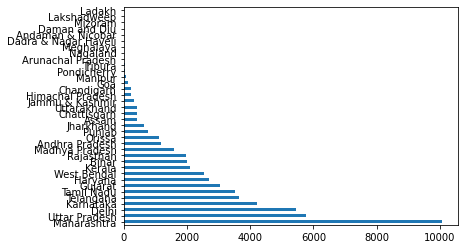

In [29]:
print('No of companies registered in each state \n')
y=data.groupby(['state']).size().sort_values(ascending=False)
import matplotlib.pyplot as plt
x=data['state'].value_counts()[:36].plot(kind='barh')


In [20]:
data.activity_description.unique()

array(['Construction', 'Business Services', 'Finance',
       'Manufacturing (Metals & Chemicals, and products thereof)',
       'Manufacturing (Paper & Paper products, Publishing, printing',
       'Transport, storage and Communications',
       'Manufacturing (Food stuffs)', 'Agriculture and Allied Activities',
       'Manufacturing (Machinery & Equipments)',
       'Community, personal & Social Services', 'Manufacturing (Others)',
       'Trading', 'Electricity, Gas & Water companies',
       'Real Estate and Renting', 'Manufacturing (Textiles)',
       'Mining & Quarrying', 'Insurance',
       'Manufacturing (Leather & products thereof)',
       'Manufacturing (Wood Products)',
       'Manufacturing (Paper & Paper products, Publishing, printingand reproduction of recorded media)'],
      dtype=object)

<AxesSubplot:ylabel='category'>

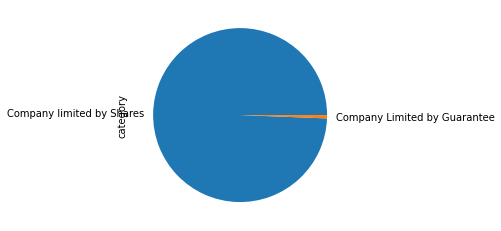

In [28]:
data['category'].value_counts()[:2].plot(kind='pie')